In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("D:\\Data Science cource\\crop_yield_dataset.csv")

In [3]:
df.head()

,Crop,Region,Soil_Type,Soil_pH,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Irrigation,Pesticides_Used_kg,Planting_Density,Previous_Crop,Yield_ton_per_ha
0,Maize,Region_C,Sandy,7.01,1485.4,19.7,40.3,105.1,Drip,10.2,23.2,Rice,101.48
1,Barley,Region_D,Loam,5.79,399.4,29.1,55.4,221.8,Sprinkler,35.5,7.4,Barley,127.39
2,Rice,Region_C,Clay,7.24,980.9,30.5,74.4,61.2,Sprinkler,40.0,5.1,Wheat,68.99
3,Maize,Region_D,Loam,6.79,1054.3,26.4,62.0,257.8,Drip,42.7,23.7,NaN,169.06
4,Maize,Region_D,Sandy,5.96,744.6,20.4,70.9,195.8,Drip,25.5,15.6,Maize,118.71


In [4]:
df.shape

(10000, 13)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Crop                10000 non-null  str    
 1   Region              10000 non-null  str    
 2   Soil_Type           10000 non-null  str    
 3   Soil_pH             10000 non-null  float64
 4   Rainfall_mm         10000 non-null  float64
 5   Temperature_C       10000 non-null  float64
 6   Humidity_pct        10000 non-null  float64
 7   Fertilizer_Used_kg  10000 non-null  float64
 8   Irrigation          7462 non-null   str    
 9   Pesticides_Used_kg  10000 non-null  float64
 10  Planting_Density    10000 non-null  float64
 11  Previous_Crop       7969 non-null   str    
 12  Yield_ton_per_ha    10000 non-null  float64
dtypes: float64(8), str(5)
memory usage: 1.2 MB


In [6]:
df.isnull().sum()

Crop                     0
Region                   0
Soil_Type                0
Soil_pH                  0
Rainfall_mm              0
Temperature_C            0
Humidity_pct             0
Fertilizer_Used_kg       0
Irrigation            2538
Pesticides_Used_kg       0
Planting_Density         0
Previous_Crop         2031
Yield_ton_per_ha         0
dtype: int64

In [7]:
df['Previous_Crop'].value_counts()

Previous_Crop
Rice      2072
Maize     1972
Barley    1965
Wheat     1960
Name: count, dtype: int64

In [8]:
df['Irrigation'].value_counts()

Irrigation
Flood        2530
Drip         2472
Sprinkler    2460
Name: count, dtype: int64

In [9]:
df['Irrigation'].mode()

0    Flood
Name: Irrigation, dtype: str

In [10]:
df['Irrigation'].mode()[0]

'Flood'

In [11]:
df.columns


Index(['Crop', 'Region', 'Soil_Type', 'Soil_pH', 'Rainfall_mm',
       'Temperature_C', 'Humidity_pct', 'Fertilizer_Used_kg', 'Irrigation',
       'Pesticides_Used_kg', 'Planting_Density', 'Previous_Crop',
       'Yield_ton_per_ha'],
      dtype='str')

In [12]:
# the both columns which has null values are object datatype
#replace will mode() for handling null values

In [13]:
df['Irrigation']=df['Irrigation'].fillna(df['Irrigation'].mode()[0])

In [14]:
df['Previous_Crop']=df['Previous_Crop'].fillna(df['Previous_Crop'].mode()[0])

In [15]:
df.isnull().sum()

Crop                  0
Region                0
Soil_Type             0
Soil_pH               0
Rainfall_mm           0
Temperature_C         0
Humidity_pct          0
Fertilizer_Used_kg    0
Irrigation            0
Pesticides_Used_kg    0
Planting_Density      0
Previous_Crop         0
Yield_ton_per_ha      0
dtype: int64

In [16]:
df.dtypes

Crop                      str
Region                    str
Soil_Type                 str
Soil_pH               float64
Rainfall_mm           float64
Temperature_C         float64
Humidity_pct          float64
Fertilizer_Used_kg    float64
Irrigation                str
Pesticides_Used_kg    float64
Planting_Density      float64
Previous_Crop             str
Yield_ton_per_ha      float64
dtype: object

In [17]:
num_cols=df.select_dtypes(include=['float64','int64']).columns

In [18]:
num_cols

Index(['Soil_pH', 'Rainfall_mm', 'Temperature_C', 'Humidity_pct',
       'Fertilizer_Used_kg', 'Pesticides_Used_kg', 'Planting_Density',
       'Yield_ton_per_ha'],
      dtype='str')

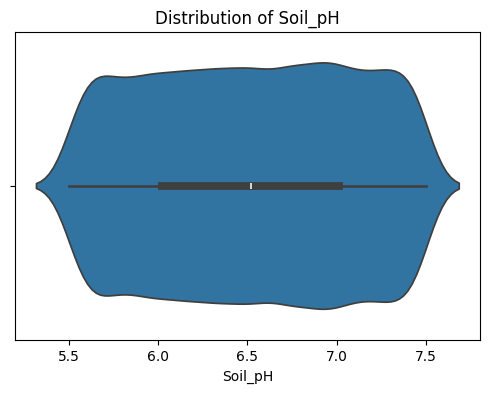

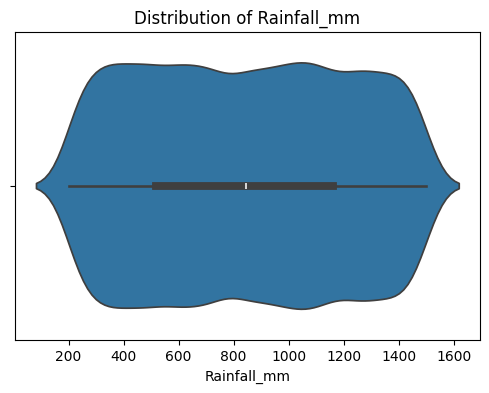

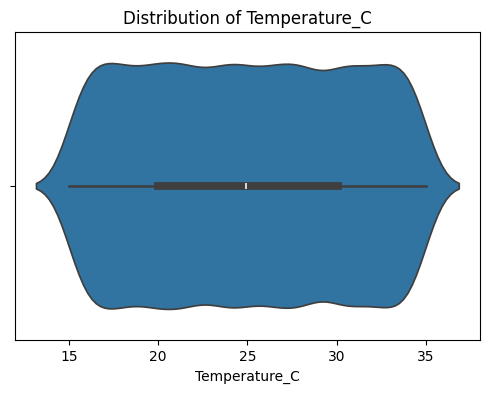

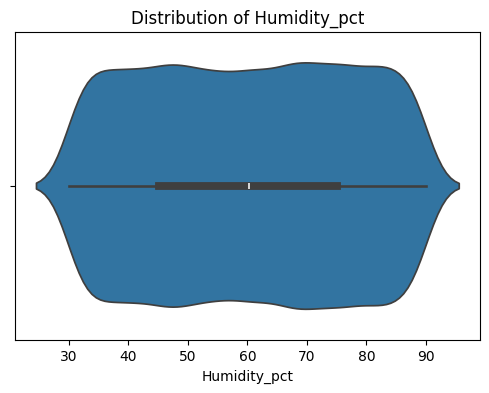

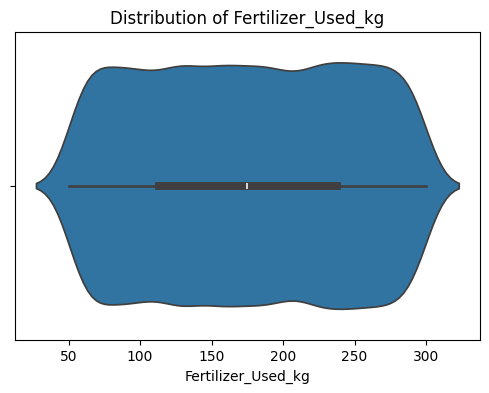

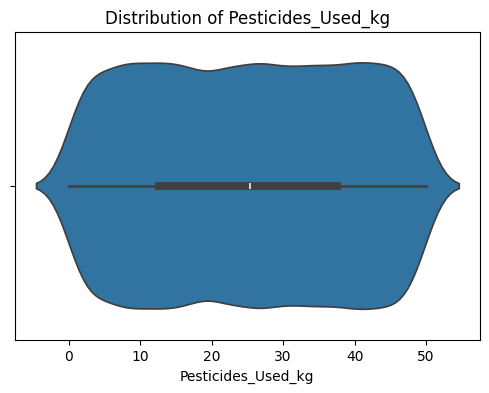

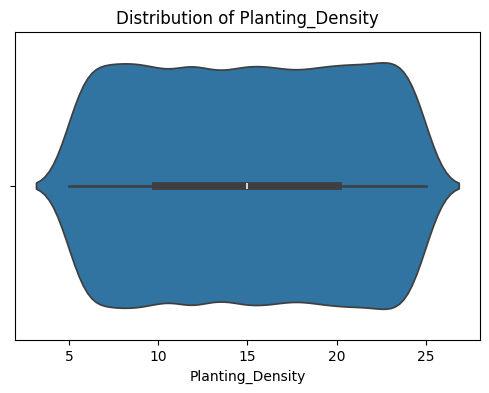

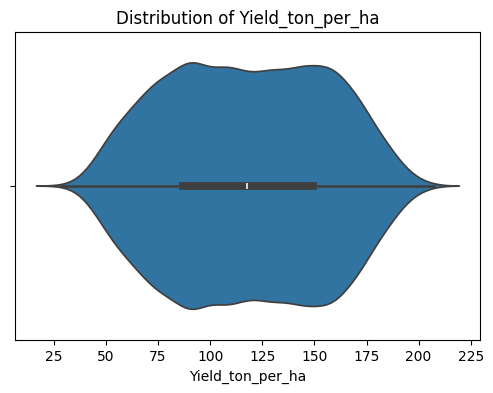

In [19]:
#Univariate analysis on num_cols
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


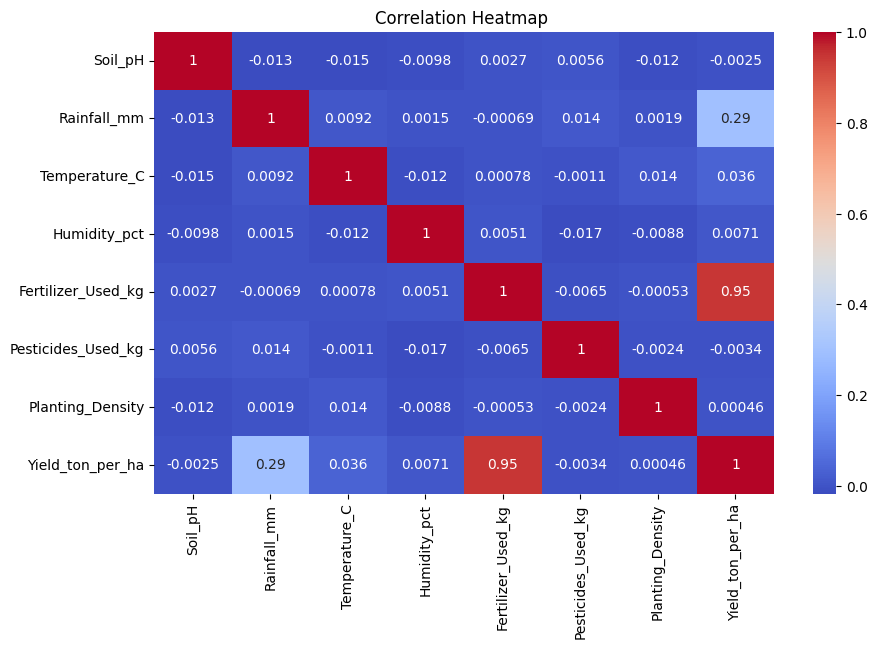

In [20]:
#corr()
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap ')
plt.show()


In [21]:
#The heatmap showing that yield is dependent on multiFeature.Any single Feature not strongly impacting yield alonely

In [22]:
cat_col=df.select_dtypes(include=['object']).columns

    

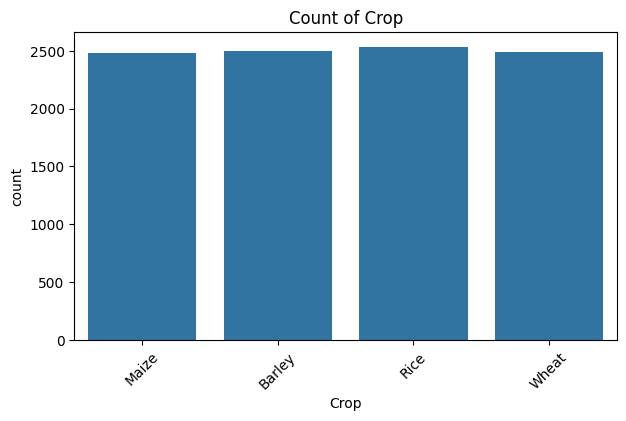

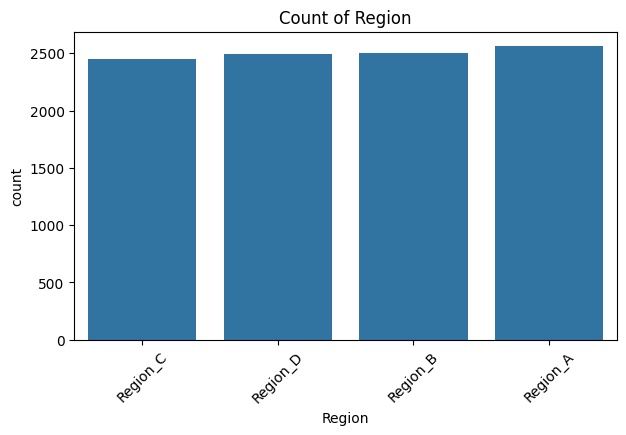

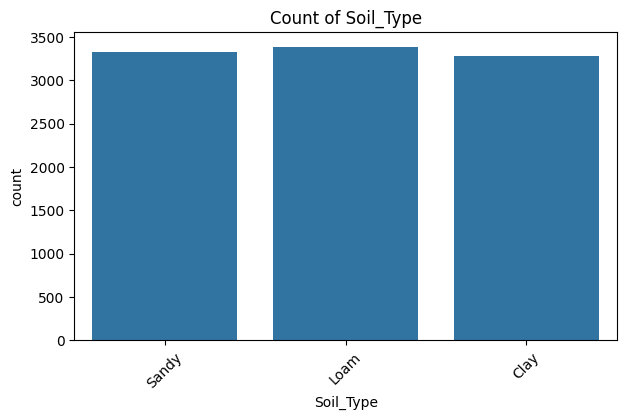

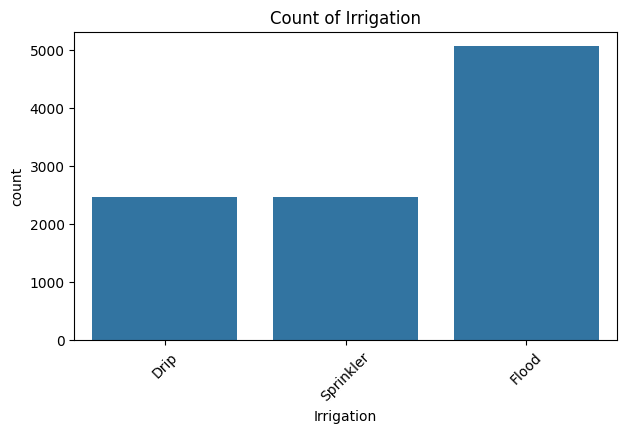

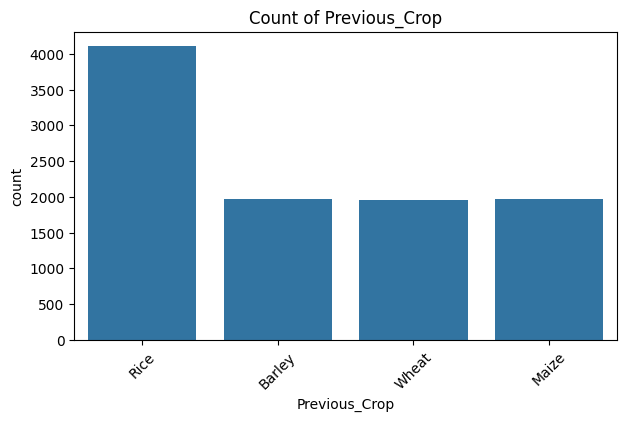

In [23]:
for col in cat_col:
    plt.figure(figsize=(7,4))
    sns.countplot(x=df[col])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


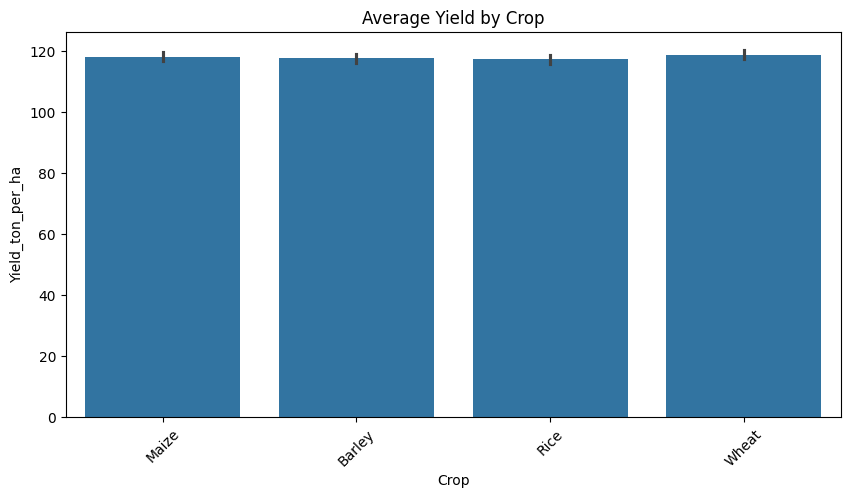

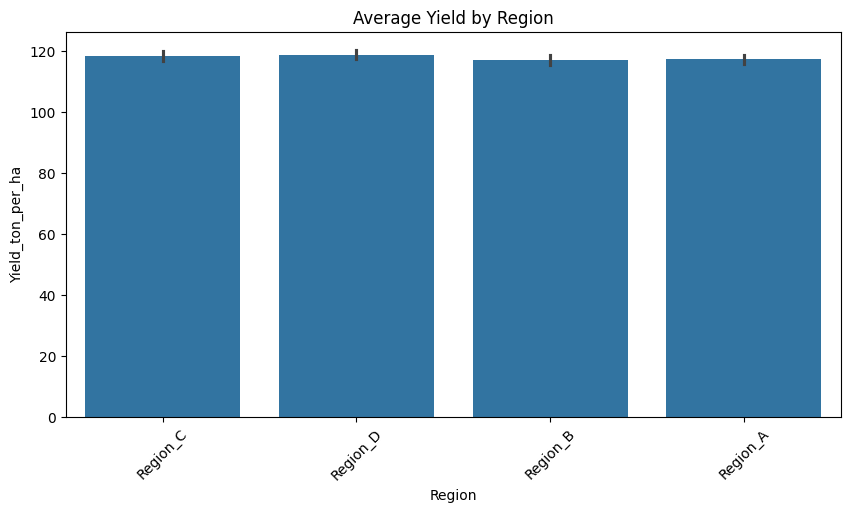

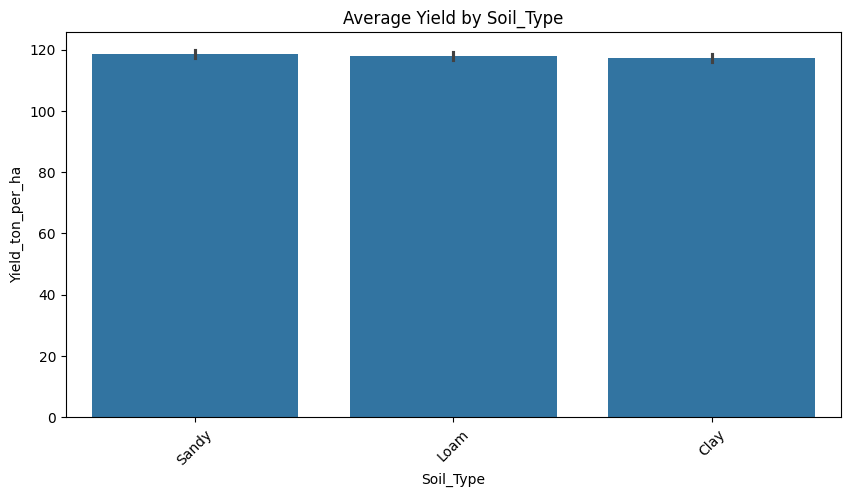

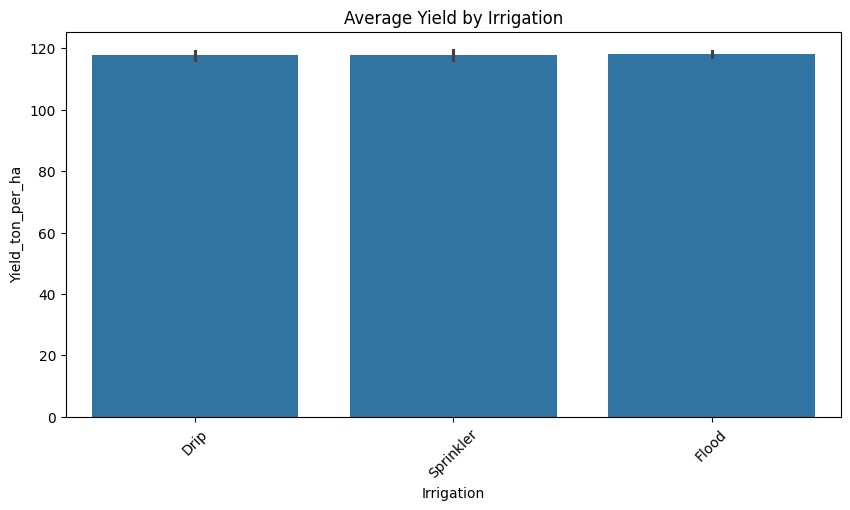

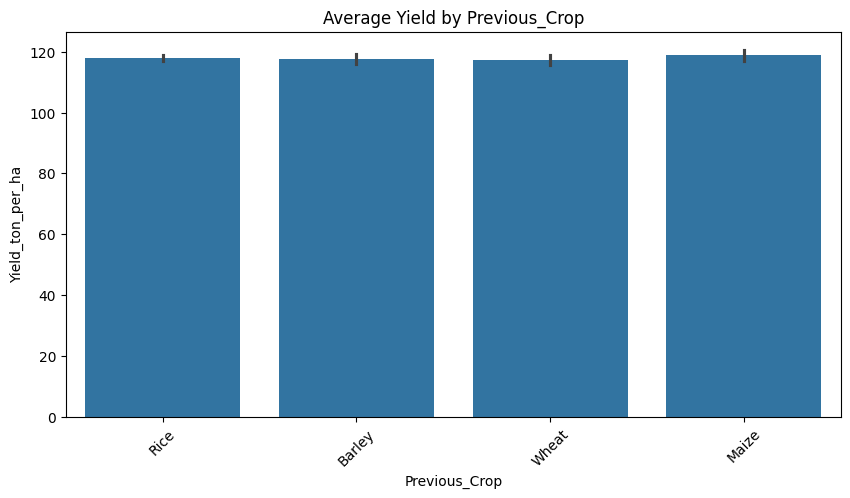

In [24]:
for col in cat_col:
    plt.figure(figsize=(10,5))
    sns.barplot(x=col, y='Yield_ton_per_ha', data=df)
    plt.title(f'Average Yield by {col}')
    plt.xticks(rotation=45)
    plt.show()


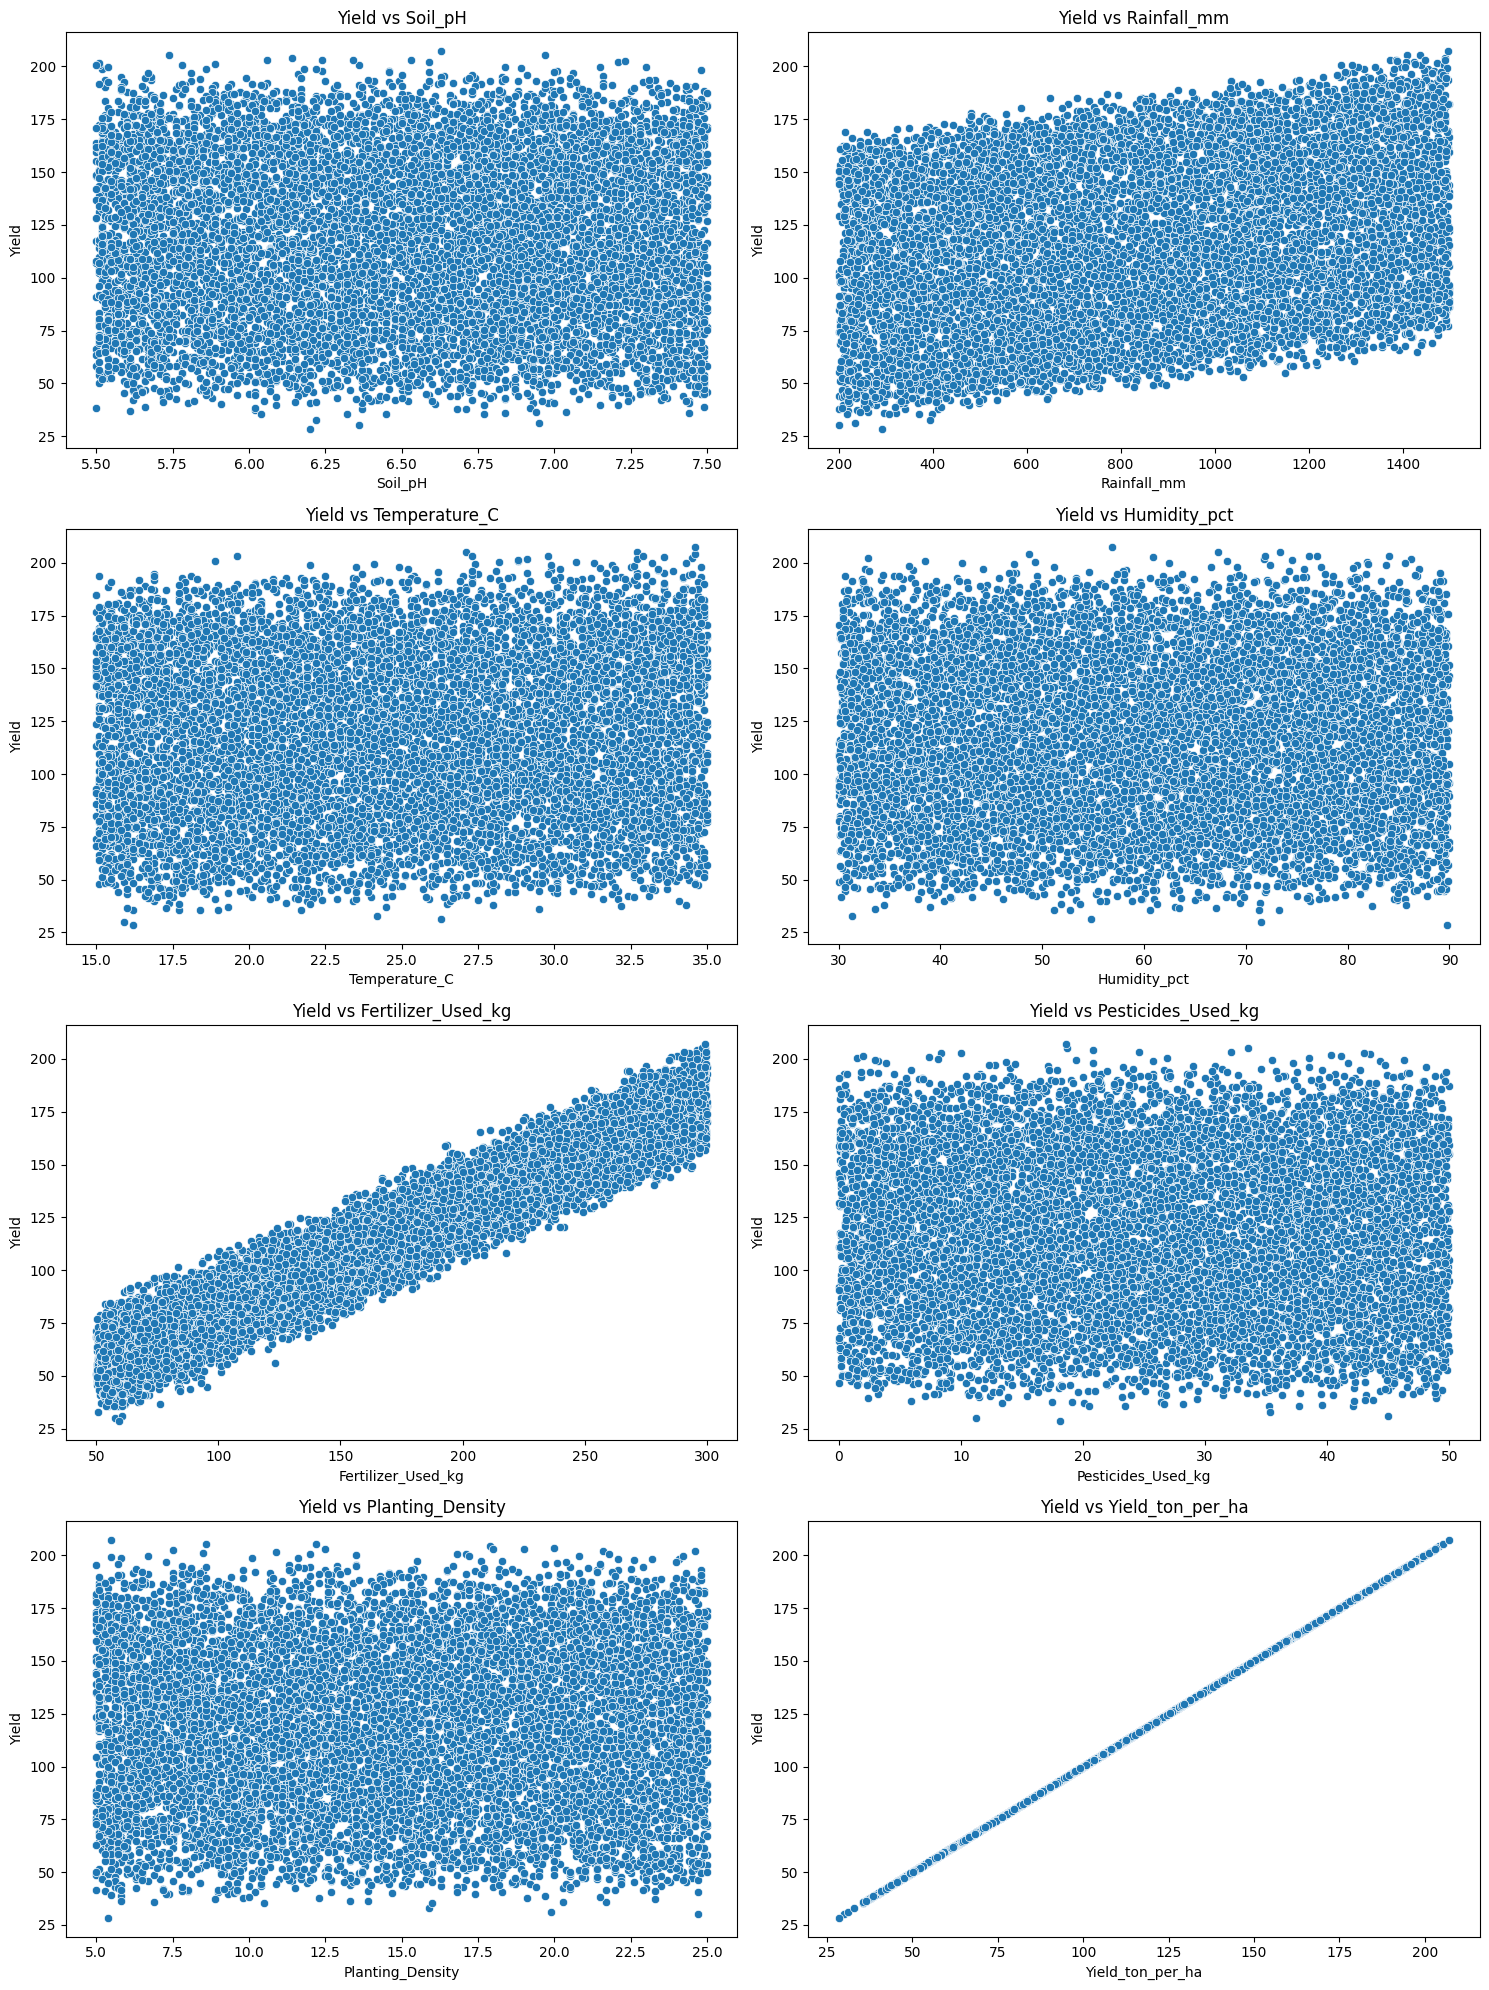

In [25]:
#Bivariate analysis
#numerical_cols vs yield

plt.figure(figsize=(15, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=df[col], y=df['Yield_ton_per_ha'])
    plt.title(f"Yield vs {col}")
    plt.xlabel(col)
    plt.ylabel("Yield")

plt.tight_layout()
plt.show()

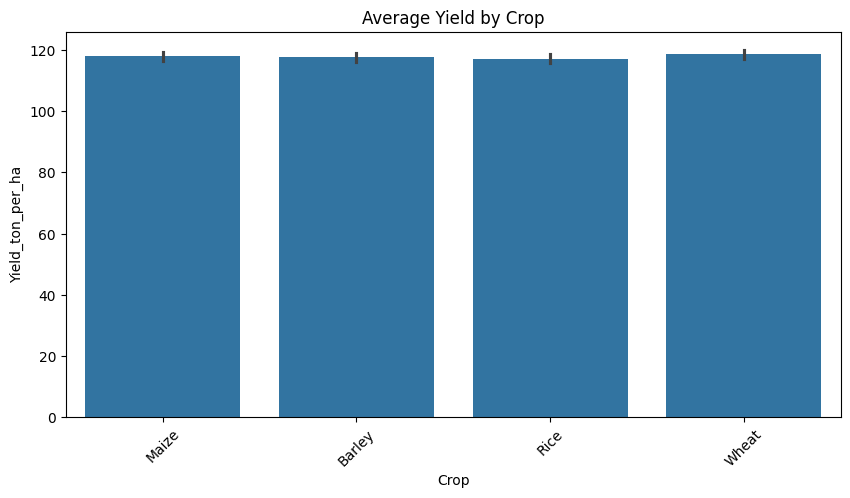

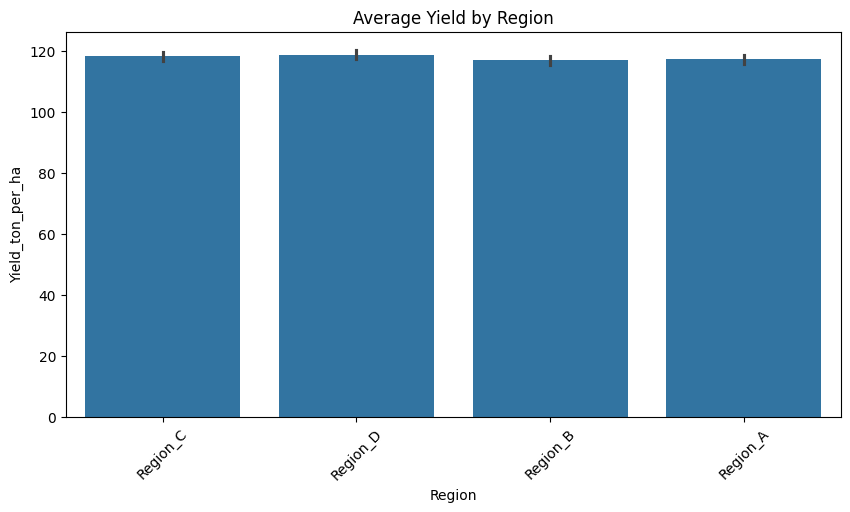

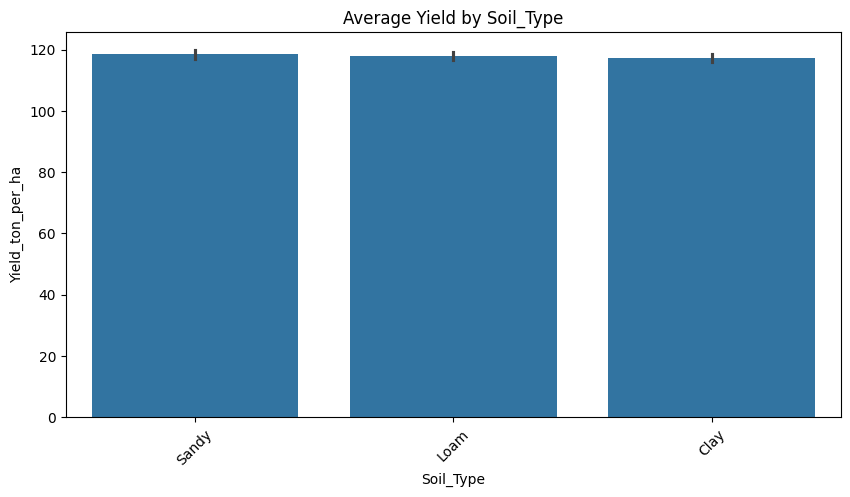

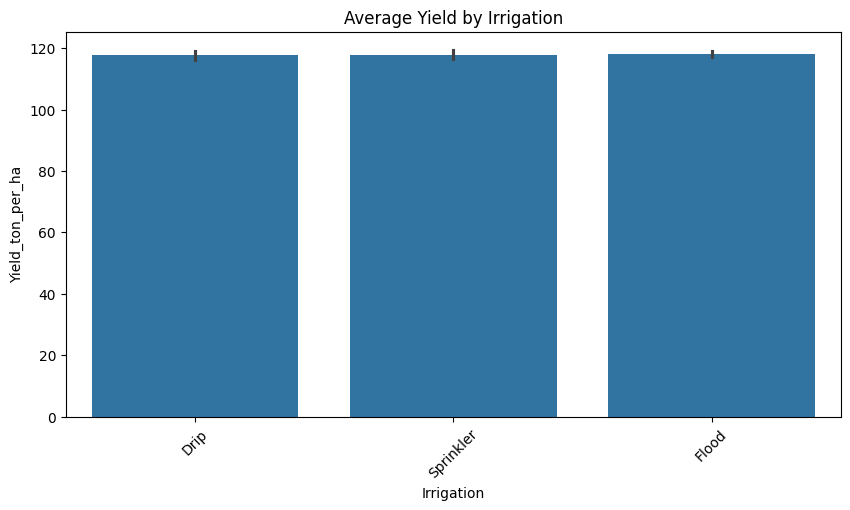

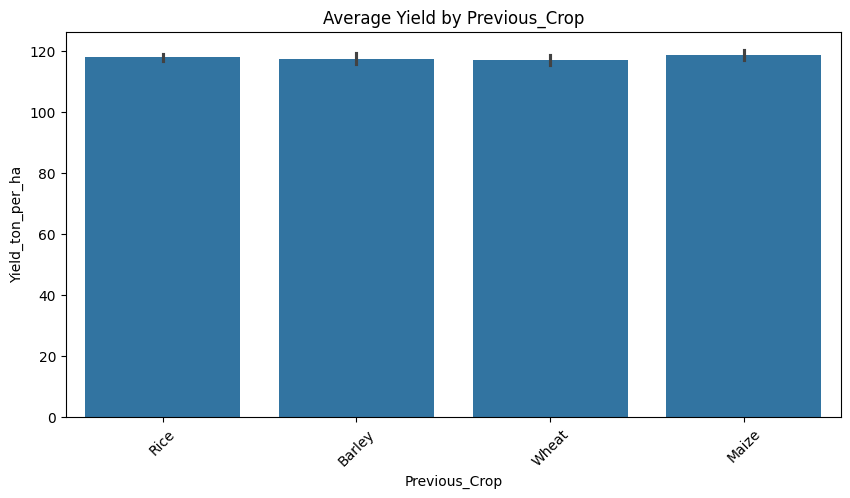

In [26]:
#Bivariate analysis 
#categorical vs Yield
for col in cat_col:
    plt.figure(figsize=(10,5))
    sns.barplot(x=col, y='Yield_ton_per_ha', data=df)
    plt.title(f'Average Yield by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [27]:
for i in cat_col:
    print(i,"no of unique values:",df[i].nunique())

Crop no of unique values: 4
Region no of unique values: 4
Soil_Type no of unique values: 3
Irrigation no of unique values: 3
Previous_Crop no of unique values: 4


In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
Crop_encoder=LabelEncoder()
df['Crop']=Crop_encoder.fit_transform(df['Crop'])
Region_encoder=LabelEncoder()
df['Region']=Region_encoder.fit_transform(df['Region'])
Soil_Type_encoder=LabelEncoder()
df['Soil_Type']=Soil_Type_encoder.fit_transform(df['Soil_Type'])
Irrigation_encoder=LabelEncoder()
df['Irrigation']=Irrigation_encoder.fit_transform(df['Irrigation'])
Previous_Crop_encoder=LabelEncoder()
df['Previous_Crop']=Previous_Crop_encoder.fit_transform(df['Previous_Crop'])



In [29]:

df.head()

,Crop,Region,Soil_Type,Soil_pH,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Irrigation,Pesticides_Used_kg,Planting_Density,Previous_Crop,Yield_ton_per_ha
0,1,2,2,7.01,1485.4,19.7,40.3,105.1,0,10.2,23.2,2,101.48
1,0,3,1,5.79,399.4,29.1,55.4,221.8,2,35.5,7.4,0,127.39
2,2,2,0,7.24,980.9,30.5,74.4,61.2,2,40.0,5.1,3,68.99
3,1,3,1,6.79,1054.3,26.4,62.0,257.8,0,42.7,23.7,2,169.06
4,1,3,2,5.96,744.6,20.4,70.9,195.8,0,25.5,15.6,1,118.71


In [30]:
df['Region'].value_counts()

Region
0    2561
1    2501
3    2492
2    2446
Name: count, dtype: int64

In [31]:
x=df.drop('Yield_ton_per_ha',axis=1)
y=df['Yield_ton_per_ha']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
x_train.shape

(8000, 12)

In [34]:
#As the target is continuos numerical use Regressor 
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(
    n_estimators=200,
    criterion='squared_error',
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    bootstrap=True,
    random_state=43)

In [35]:
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",20
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",4
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [36]:
y_pred=model.predict(x_test)

In [37]:
y_pred

array([162.85424791,  99.48122468,  53.85861182, ..., 151.5270102 ,
       143.23461743, 149.73871353], shape=(2000,))

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
r2_score(y_test,y_pred)

0.9802391623828994

In [40]:
mean_absolute_error(y_test,y_pred)

4.304434249398355

In [41]:
mean_squared_error(y_test,y_pred)

28.534492121440277

In [42]:
new_data=pd.DataFrame({'Crop':["Maize"],
                       'Region':["Region_B"],
                       'Soil_Type':["Clay"],
                       'Soil_pH':[7.01],
                       'Rainfall_mm':[980.9],
                       'Temperature_C':[29.1],
                       'Humidity_pct':[40.3], 
                       'Fertilizer_Used_kg':[61.2],
                       'Irrigation':["Drip"],
                       'Pesticides_Used_kg':[10.2],
                       'Planting_Density':[35.5], 
                       'Previous_Crop':["Wheat"],
                       })

In [43]:
new_data

,Crop,Region,Soil_Type,Soil_pH,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Irrigation,Pesticides_Used_kg,Planting_Density,Previous_Crop
0,Maize,Region_B,Clay,7.01,980.9,29.1,40.3,61.2,Drip,10.2,35.5,Wheat


In [44]:
#encoding
encoders={"Crop":Crop_encoder,
          "Region":Region_encoder,
          "Soil_Type":Soil_Type_encoder,
          "Irrigation":Irrigation_encoder,
          "Previous_Crop":Previous_Crop_encoder
         }


In [45]:
cat_columns=new_data.select_dtypes(include=['object']).columns

In [46]:

     
for i in cat_columns:
    new_data[i]=encoders[i].transform(new_data[i])

In [47]:
new_data

,Crop,Region,Soil_Type,Soil_pH,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Irrigation,Pesticides_Used_kg,Planting_Density,Previous_Crop
0,1,1,0,7.01,980.9,29.1,40.3,61.2,0,10.2,35.5,3


In [48]:
prediction=model.predict(new_data)

In [49]:
prediction

array([66.88328499])

In [50]:
from sklearn.tree import plot_tree

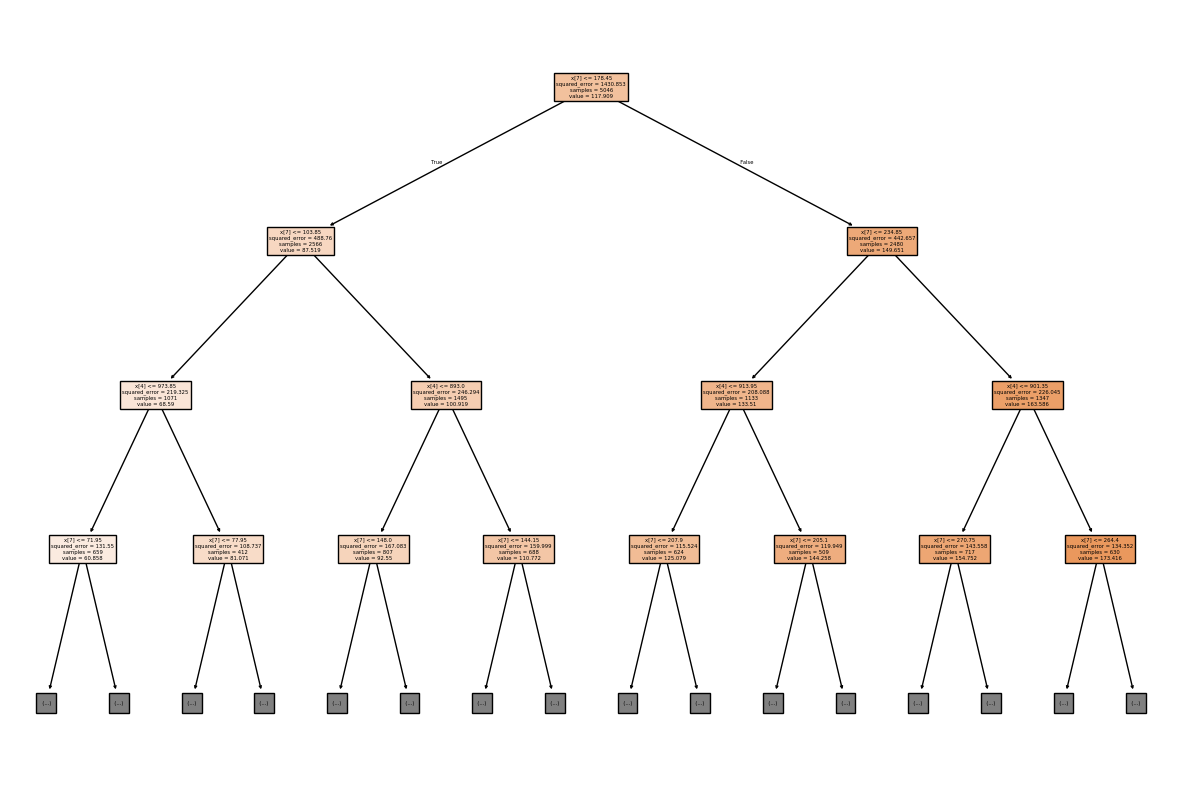

In [51]:
tree=model.estimators_[0]#taking first tree as there are multiple trees .. we can't plot multiple at same time
plt.figure(figsize=(15,10))
plot_tree(tree,max_depth=3,filled=True)
plt.show()

In [62]:
#trying on another new_data
new_data1=pd.DataFrame({'Crop':["Barley"],
                       'Region':["Region_B"],
                       'Soil_Type':["Clay"],
                       'Soil_pH':[7.01],
                       'Rainfall_mm':[1000.9],
                       'Temperature_C':[29.1],
                       'Humidity_pct':[40.3], 
                       'Fertilizer_Used_kg':[55.2],
                       'Irrigation':["Sprinkler"],
                       'Pesticides_Used_kg':[10.2],
                       'Planting_Density':[35.5], 
                       'Previous_Crop':["Maize"],
                       })

In [63]:
     
for i in cat_columns:
    new_data1[i]=encoders[i].transform(new_data1[i])

In [64]:
new_data1

,Crop,Region,Soil_Type,Soil_pH,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Irrigation,Pesticides_Used_kg,Planting_Density,Previous_Crop
0,0,1,0,7.01,1000.9,29.1,40.3,55.2,2,10.2,35.5,1


In [66]:
prediction1=model.predict(new_data1)

In [67]:
prediction1

array([64.28933179])